# EM 算法简单示例（一维正太分布组成的高斯混合模型）byself

In [24]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt

In [7]:
# 定义一个函数，可以产生高斯混合模型的样本
def GMM_samples(N, K, mu_list, sigma2_list, sample_nums_list):
    
    assert len(mu_list) == len(sigma2_list) == K and sum(sample_nums_list) == N
    
    if K >= 1:
        samples = np.random.normal(mu_list[0], math.sqrt(sigma2_list[0]), sample_nums_list[0])
    for k in range(1, K):
        k_samples = np.random.normal(mu_list[k], math.sqrt(sigma2_list[k]), sample_nums_list[k])
        samples = np.concatenate((samples, k_samples), axis=0)
    np.random.shuffle(samples)  # 没有返回值
    return samples
        
samples = GMM_samples(N=10000, K=3, mu_list=[0., 3., 6.], sigma2_list=[0.2, 0.4, 0.6], sample_nums_list=[1000, 3000, 6000])
print(samples)

[7.01086373 0.04303002 2.47251907 ... 6.32930494 1.79172823 2.38281444]


In [8]:
# 真实 GMM 参数
# pi: 0.1, 0.3, 0.6
# mu: 0, 3, 6
# sigma2: 0.2, 0.4, 0.6

# 选择的初始参数
pi_1, pi_2, pi_3 = 0.3, 0.2, 0.5
mu_1, mu_2, mu_3 = 1., 2., 7.
sigma2_1, sigma2_2, sigma2_3 = 0.7, 0.2, 0.3

pi_array_0 = np.array([pi_1, pi_2, pi_3])
mu_array_0 = np.array([mu_1, mu_2, mu_3])
sigma2_array_0 = np.array([sigma2_1, sigma2_2, sigma2_3])

In [18]:
pi_array = pi_array_0
mu_array = mu_array_0
sigma2_array = sigma2_array_0

def gauss(y, mu, sigma2):
    '''计算一维正太分布的概率密度值。'''
    result = 1 / math.sqrt(2 * math.pi *sigma2) * math.e ** (- math.pow(y - mu, 2) / (2 * sigma2))
    return result

while True:
    
    # 尽量使用矩阵运算、广播运算
    
    # 计算 r_ik_array。实际上是一个二维矩阵，形状为 N×K，与下标 ik 保持了一致。
    r_ik_list = list()
    for i in range(10000):  # 此处能不能继续改写成矩阵运算呢？
        for k in range(3):
            r_ik_list.append(pi_array[k] * gauss(samples[i], mu_array[k], sigma2_array[k]) / sum(
                [pi_array[j] * gauss(samples[i], mu_array[j], sigma2_array[j]) for j in range(3)]))
    r_ik_array = np.array(r_ik_list).reshape((10000, 3))
    
    # 计算新的 mu
    a = r_ik_array * samples.reshape((10000, 1))  # 变量名字要重新命名
    a = a.sum(axis=0)
    b = r_ik_array.sum(axis=0)
    mu_new = a / b
    
    # 计算新的 sigma2
    a = (samples.reshape(10000, 1) - mu_array.reshape((1, 3))) ** 2  # 变量名字要重新命名
    a = r_ik_array * a
    a = a.sum(axis=0)
    b = r_ik_array.sum(axis=0)
    sigma2_new = a / b
    
    # 计算新的 pi
    # 计算 n_k
    n_k = r_ik_array.sum(axis=0)
    pi_new = n_k / 10000
    
    if (all(np.abs(pi_array - pi_new) <= 0.01) and all(np.abs(mu_array - mu_new) <= 0.01) and 
            all(np.abs(sigma2_array - sigma2_new) <= 0.01)):
        print('已满足精度 <= 0.01 的要求！')
        break
    
    pi_array = pi_new
    mu_array = mu_new
    sigma2_array = sigma2_new
    
    print('pi:', pi_array)
    print('mu:', mu_array)
    print('sigma2:', sigma2_array)

pi: [0.25783884 0.15780554 0.58435562]
mu: [2.06842894 2.73764235 6.05471742]
sigma2: [4.16595835 0.78910044 1.40227595]
pi: [0.24700047 0.15649465 0.59650488]
mu: [2.11031617 2.89938418 5.91521965]
sigma2: [3.86966412 0.5445844  0.85794549]
pi: [0.24352647 0.16800634 0.58846719]
mu: [1.99235961 2.98181844 5.97703313]
sigma2: [3.65343271 0.3457337  0.67872224]
pi: [0.23603273 0.18040949 0.58355778]
mu: [1.90249005 3.0255712  6.01234876]
sigma2: [3.50763075 0.27237433 0.59859362]
pi: [0.22971827 0.18777105 0.58251068]
mu: [1.83244918 3.05059026 6.02509983]
sigma2: [3.39785282 0.24905641 0.57144143]
pi: [0.22469463 0.19186043 0.58344494]
mu: [1.77264768 3.06551357 6.02797143]
sigma2: [3.29132446 0.24204254 0.56449103]
pi: [0.22012837 0.19469273 0.5851789 ]
mu: [1.71644624 3.07475347 6.0271721 ]
sigma2: [3.18294509 0.24081494 0.56416115]
pi: [0.21559463 0.19725527 0.5871501 ]
mu: [1.66096667 3.08087283 6.02508746]
sigma2: [3.07465673 0.24183743 0.56594931]
pi: [0.21094421 0.19992582 0.589

In [ ]:
# pi: 0.1, 0.3, 0.6
# mu: 0, 3, 6
# sigma2: 0.2, 0.4, 0.6

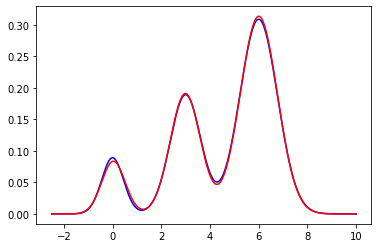

In [62]:
# 画图
x = np.linspace(-2.5, 10, 50000)
gmm_real = [0.1 * gauss(item, 0, 0.2) + 0.3 * gauss(item, 3, 0.4) + 0.6 * gauss(item, 6, 0.6) for item in x]
gmm_em = [pi_array[0] * gauss(item, mu_array[0], sigma2_array[0]) + 
          pi_array[1] * gauss(item, mu_array[1], sigma2_array[1]) + 
          pi_array[2] * gauss(item, mu_array[2], sigma2_array[2]) for item in x]
plt.plot(x, gmm_real, color='b');
plt.plot(x, gmm_em, color='r');

# 将上述代码简单重构为一个类

In [34]:
# 还可以重构成一个类
class GMM_EM:
    def __init__(self, N, K, mu_list, sigma2_list, sample_nums_list, pi_array_0, mu_array_0, sigma2_array_0):
        
        assert len(mu_list) == len(sigma2_list) == K and sum(sample_nums_list) == N
        
        self.N = N  # 样本的个数
        self.K = K  # 高斯混合模型中的正太分布个数
        self.mu_list = mu_list  # 均值列表
        self.sigma2_list = sigma2_list  # 方差列表
        self.sample_nums_list = sample_nums_list  # 从每个正态分布中采样多少个样本
        self.pi_array_0 = pi_array_0  # EM 算法中的初始正太分布系数
        self.mu_array_0 = mu_array_0  # EM 算法中的初始均值
        self.sigma2_array_0 = sigma2_array_0  # EM 算法中的初始方差
    
    def produce_samples(self):
        if self.K >= 1:
            samples = np.random.normal(self.mu_list[0], math.sqrt(self.sigma2_list[0]), self.sample_nums_list[0])
        for k in range(1, self.K):
            k_samples = np.random.normal(self.mu_list[k], math.sqrt(self.sigma2_list[k]), self.sample_nums_list[k])
            samples = np.concatenate((samples, k_samples), axis=0)
        np.random.shuffle(samples)  # 没有返回值
        return samples
    
    def run_EM(self):
        
        def gauss(y, mu, sigma2):
            '''计算一维正太分布的概率密度值。'''
            result = 1 / math.sqrt(2 * math.pi *sigma2) * math.e ** (- math.pow(y - mu, 2) / (2 * sigma2))
            return result
        
        pi_array = self.pi_array_0
        mu_array = self.mu_array_0
        sigma2_array = self.sigma2_array_0
        
        samples = self.produce_samples()
        
        while True:
    
            # 尽量使用矩阵运算、广播运算

            # 计算 r_ik_array。实际上是一个二维矩阵，形状为 N×K，与下标 ik 保持了一致。
            r_ik_list = list()
            for i in range(self.N):  # 此处能不能继续改写成矩阵运算呢？
                for k in range(self.K):
                    r_ik_list.append(pi_array[k] * gauss(samples[i], mu_array[k], sigma2_array[k]) / sum(
                        [pi_array[j] * gauss(samples[i], mu_array[j], sigma2_array[j]) for j in range(self.K)]))
            r_ik_array = np.array(r_ik_list).reshape((self.N, self.K))

            # 计算新的 mu
            a = r_ik_array * samples.reshape((self.N, 1))  # 变量名字要重新命名
            a = a.sum(axis=0)
            b = r_ik_array.sum(axis=0)
            mu_new = a / b

            # 计算新的 sigma2
            a = (samples.reshape(self.N, 1) - mu_array.reshape((1, self.K))) ** 2  # 变量名字要重新命名
            a = r_ik_array * a
            a = a.sum(axis=0)
            b = r_ik_array.sum(axis=0)
            sigma2_new = a / b

            # 计算新的 pi
            # 计算 n_k
            n_k = r_ik_array.sum(axis=0)
            pi_new = n_k / self.N

            if (all(np.abs(pi_array - pi_new) <= 0.01) and all(np.abs(mu_array - mu_new) <= 0.01) and 
                    all(np.abs(sigma2_array - sigma2_new) <= 0.01)):
                print('已满足精度 <= 0.01 的要求！')
                break

            pi_array = pi_new
            mu_array = mu_new
            sigma2_array = sigma2_new

            print('pi:', pi_array)
            print('mu:', mu_array)
            print('sigma2:', sigma2_array)

In [35]:
gmm_em = GMM_EM(N = 10000, 
                K = 3, 
                mu_list = [0., 3., 6.], 
                sigma2_list = [0.2, 0.4, 0.6], 
                sample_nums_list = [1000, 3000, 6000], 
                pi_array_0 = np.array([0.3, 0.2, 0.5]), 
                mu_array_0 = np.array([1., 2., 7.]), 
                sigma2_array_0 = np.array([0.7, 0.2, 0.3]),)
gmm_em.run_EM()

pi: [0.25937161 0.15849798 0.58213041]
mu: [2.08639276 2.74690516 6.05871692]
sigma2: [4.27555589 0.78492683 1.38004602]
pi: [0.24828849 0.15798148 0.59373003]
mu: [2.12746108 2.9157866  5.91957415]
sigma2: [3.96690376 0.52271301 0.8373797 ]
pi: [0.24337016 0.17077982 0.58585002]
mu: [2.00684063 2.99180732 5.98130537]
sigma2: [3.76983096 0.32732374 0.65804547]
pi: [0.23510926 0.18378667 0.58110407]
mu: [1.92093133 3.02655634 6.01548681]
sigma2: [3.64921073 0.26443961 0.58068168]
pi: [0.2288822  0.19125744 0.57986036]
mu: [1.85945858 3.04570198 6.02797404]
sigma2: [3.56866569 0.24713617 0.5546495 ]
pi: [0.22414973 0.195463   0.58038727]
mu: [1.80891202 3.05706955 6.03128703]
sigma2: [3.49253188 0.24370625 0.54757057]
pi: [0.21991088 0.19839806 0.58169106]
mu: [1.76106134 3.06420578 6.03118136]
sigma2: [3.4114709  0.24472972 0.54681668]
pi: [0.21572112 0.20096641 0.58331248]
mu: [1.71264225 3.06909762 6.02979509]
sigma2: [3.32509882 0.24717824 0.548226  ]
pi: [0.21142585 0.20351627 0.585